#  House Price Prediction Using Machine Learning

## 1. Introduction

Real estate pricing is influenced by a wide range of factors beyond just the size or number of rooms in a house. Elements such as location, neighborhood quality, construction year, material quality, and available amenities play a critical role in determining the final sale price. Accurate house price prediction is valuable for buyers, sellers, and real estate professionals, as it supports informed decision-making and fair market evaluations.

This project focuses on building an end-to-end **House Price Prediction and Recommendation System** using the **Ames Housing Dataset**. The goal is not only to predict house prices accurately using machine learning models, but also to analyze the relationship between various house features and prices, and to provide actionable suggestions to customers based on budget, area, and requirements.

---

## 2. Problem Statement

The objective of this project is to:

1. Perform a comprehensive data analysis on the Ames Housing dataset.
2. Build robust machine learning models to predict house prices accurately.
3. Understand how different house features influence the sale price.
4. Provide meaningful recommendations to customers to help them choose suitable houses based on price, location, and features.

The target variable for this project is **SalePrice**, which represents the final sale price of a house in dollars. Since the target variable is continuous, this is treated as a **regression problem**.

---

## 3. Dataset Overview

The dataset contains information about residential houses in Ames, Iowa, with **79 explanatory variables** describing almost every aspect of a house. These variables include:

* Property characteristics (lot area, shape, slope)
* Location details (neighborhood, zoning)
* Structural details (house style, year built, foundation)
* Quality and condition ratings
* Basement, garage, and porch information
* Sale-related information

This richness of features makes the dataset ideal for applying advanced regression and feature engineering techniques.

---

## 4. Data Understanding

Before modeling, the dataset was explored to understand:

* The number of observations and features
* Data types (numerical and categorical)
* Distribution of the target variable
* Presence of missing values
* Potential outliers

Initial exploration showed that:

* The dataset contains both numerical and categorical variables.
* Several features have missing values, especially basement, garage, and pool-related attributes.
* The target variable **SalePrice** is right-skewed, indicating the presence of high-value properties.

---

## 5. Data Cleaning and Preprocessing

### 5.1 Handling Missing Values

Missing values were handled based on the nature of the feature:

* **Numerical features**: Filled using median values to reduce the impact of outliers.
* **Categorical features**: Filled using the most frequent value (mode).
* **Basement, garage, pool-related features**: Missing values were treated as "None", indicating the absence of that feature rather than missing data.

This approach ensured that no important information was lost while maintaining data consistency.

### 5.2 Outlier Treatment

Outliers were identified using visualizations such as boxplots and scatter plots (e.g., `GrLivArea` vs `SalePrice`). Extreme values that could disproportionately affect model performance were carefully examined and treated where necessary.

---

## 6. Exploratory Data Analysis (EDA)

Exploratory Data Analysis was conducted to identify patterns, trends, and relationships between features and house prices.

### Key Insights:

* **OverallQual** has a strong positive relationship with SalePrice.
* **GrLivArea** (above-ground living area) is highly correlated with house prices.
* Certain **Neighborhoods** consistently have higher average sale prices.
* Houses with garages, better basement quality, and newer construction tend to have higher prices.

Visualizations such as histograms, boxplots, scatter plots, and correlation heatmaps were used to support these findings.

---

## 7. Feature Engineering

To improve model performance, new features were engineered:

* **HouseAge**: Difference between year sold and year built.
* **TotalBathrooms**: Combined count of full and half bathrooms.
* **TotalSquareFeet**: Sum of basement and above-ground living area.

These engineered features helped capture hidden relationships and improved predictive accuracy.

---

## 8. Encoding and Scaling

* **Categorical variables** were converted into numerical form using one-hot encoding.
* **Numerical features** were scaled using standardization to ensure that all features contribute equally to model training.

---

## 9. Model Building

Multiple regression models were implemented to predict house prices:

* Linear Regression
* Ridge Regression
* Lasso Regression
* Random Forest Regressor
* Gradient Boosting Regressor
* XGBoost Regressor

Using multiple models allowed for comparison and selection of the best-performing approach.

---

## 10. Model Evaluation and Comparison

Models were evaluated using the following metrics:

* Mean Absolute Error (MAE)
* Root Mean Squared Error (RMSE)
* R-squared (R²) score

### Model Comparison Summary:

* Linear models performed well as a baseline but struggled with non-linear relationships.
* Tree-based models captured complex interactions between features.
* **Gradient Boosting and XGBoost** delivered the best overall performance, with high R² and low error values.

Based on the evaluation metrics, **XGBoost Regressor** was selected as the best model for production use.

---

## 11. Feature Importance Analysis

Feature importance analysis from tree-based models revealed that the most influential features were:

* OverallQual
* GrLivArea
* Neighborhood
* TotalSquareFeet
* GarageCars

This confirms that both quality and size, along with location, play a major role in determining house prices.

---

## 12. Customer Recommendation System

Based on model predictions and feature analysis, recommendations were developed for customers:

* Buyers with a limited budget are advised to explore emerging neighborhoods offering better value.
* Larger families should prioritize houses with higher living area and multiple bathrooms.
* Customers seeking long-term investment should focus on newer houses with high overall quality ratings.

These recommendations help customers align their preferences with realistic pricing insights.

---

## 13. Challenges Faced

### Key Challenges:

1. **Missing Data**: Many features had missing values that required careful interpretation.
2. **High Cardinality Categorical Features**: Neighborhood and zoning variables increased dimensionality.
3. **Outliers**: Extreme property sizes affected linear models.
4. **Multicollinearity**: Some features were highly correlated.

### Solutions:

* Domain-based imputation strategies were used.
* One-hot encoding and regularization techniques handled categorical complexity.
* Tree-based models mitigated the impact of outliers and multicollinearity.

---

## 14. Conclusion

This project successfully demonstrated how machine learning can be applied to real estate price prediction. By combining thorough data analysis, feature engineering, and advanced regression models, accurate predictions were achieved. The project also delivered valuable business insights and customer-oriented recommendations.

### Future Enhancements:

* Hyperparameter tuning for further performance improvement
* Incorporating external data such as economic indicators
* Deployment as a web-based recommendation system

Overall, this project provides a comprehensive, data-driven approach to house price prediction and decision support in real estate markets.


In [2]:
# !pip install pandas numpy matplotlib seaborn scikit-learn scipy imblearn

# Data Collection & Acquisition

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import (StandardScaler, MinMaxScaler, RobustScaler, 
                                   LabelEncoder, OneHotEncoder, OrdinalEncoder)
from sklearn.feature_selection import (SelectKBest, chi2, f_classif, f_regression, 
                                       RFE, SelectFromModel, VarianceThreshold, mutual_info_regression)
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [4]:
df = pd.read_csv("data.csv")

In [5]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [9]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [10]:
df.shape

(1460, 81)

# Exploratory Data Analysis (EDA)

## Histogram and Density Plot

In [15]:
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8)

In [35]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Id' in numeric_cols:
    numeric_cols.remove('Id')
    
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

In [36]:
print(f"Total numeric columns: {len(numeric_cols)}")
print(f"Total categorical columns: {len(categorical_cols)}")

Total numeric columns: 37
Total categorical columns: 43


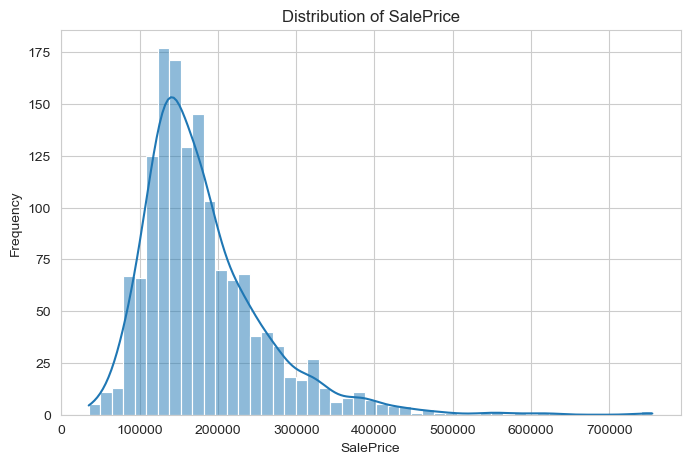

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['SalePrice'], kde=True)
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

## Count Plot (Binned SalePrice)

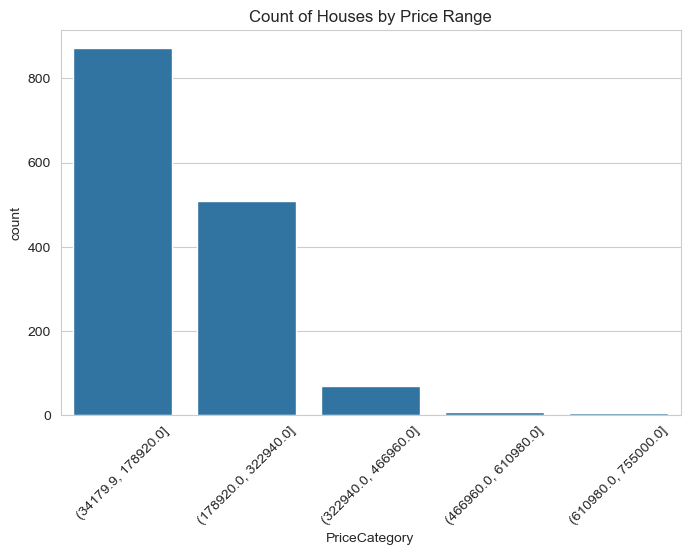

In [17]:
df['PriceCategory'] = pd.cut(df['SalePrice'], bins=5)
plt.figure(figsize=(8,5))
sns.countplot(x='PriceCategory', data=df)
plt.xticks(rotation=45)
plt.title('Count of Houses by Price Range')
plt.show()

## Box Plot (Outlier Detection)


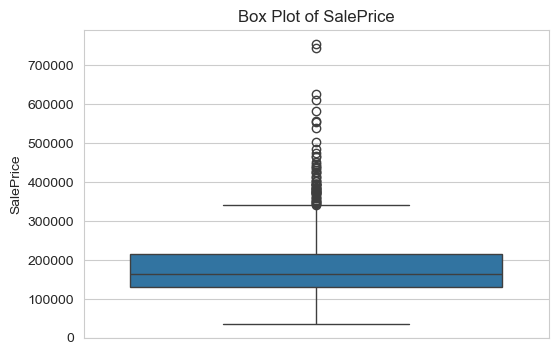

In [18]:
plt.figure(figsize=(6,4))
sns.boxplot(y=df['SalePrice'])
plt.title('Box Plot of SalePrice')
plt.show()

## Violin Plot (Distribution + Density)

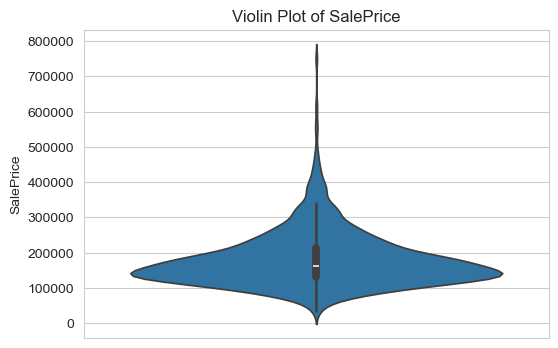

In [19]:
plt.figure(figsize=(6,4))
sns.violinplot(y=df['SalePrice'])
plt.title('Violin Plot of SalePrice')
plt.show()

## Univariate Analysis of Important Numerical Features

### Above Ground Living Area (GrLivArea)

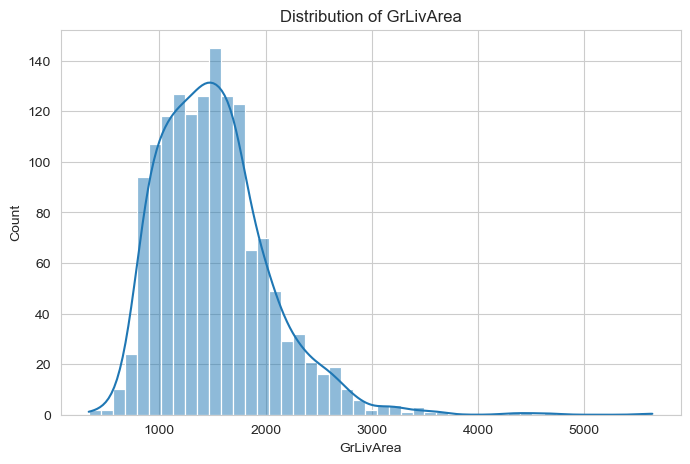

In [20]:
plt.figure(figsize=(8,5))
sns.histplot(df['GrLivArea'], kde=True)
plt.title('Distribution of GrLivArea')
plt.show()

## Overall Quality

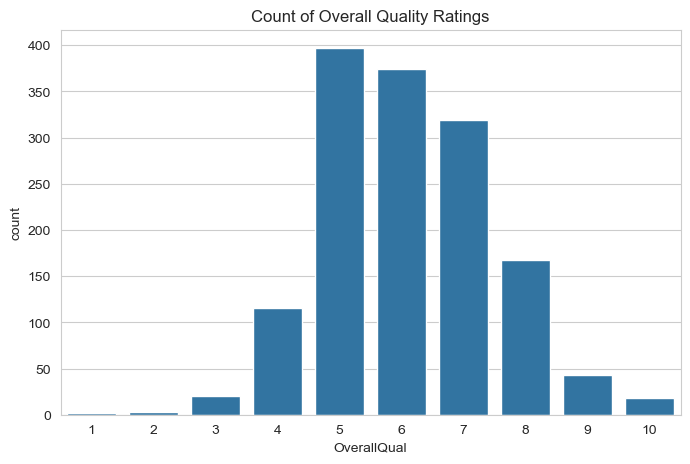

In [21]:
plt.figure(figsize=(8,5))
sns.countplot(x='OverallQual', data=df)
plt.title('Count of Overall Quality Ratings')
plt.show()

## Bivariate Analysis (Feature vs Target)
 ### GrLivArea vs SalePrice (Scatter Plot)

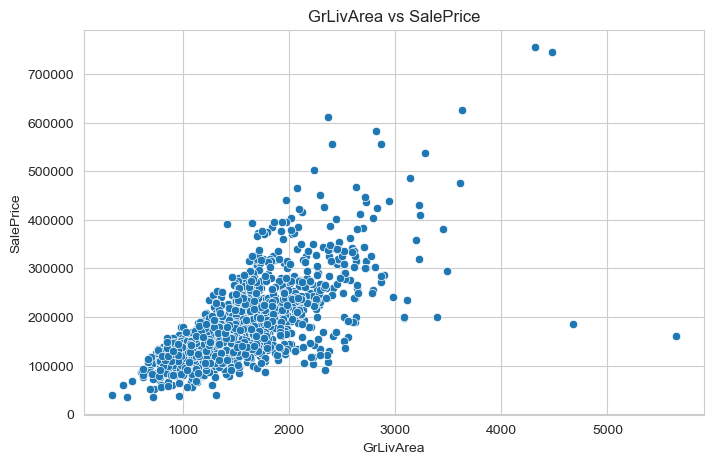

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title('GrLivArea vs SalePrice')
plt.show()

## OverallQual vs SalePrice (Box Plot)

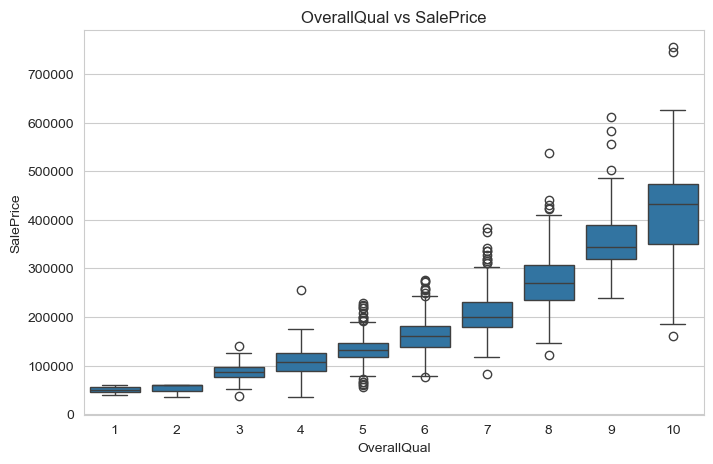

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title('OverallQual vs SalePrice')
plt.show()

## Neighborhood vs SalePrice (Box Plot)

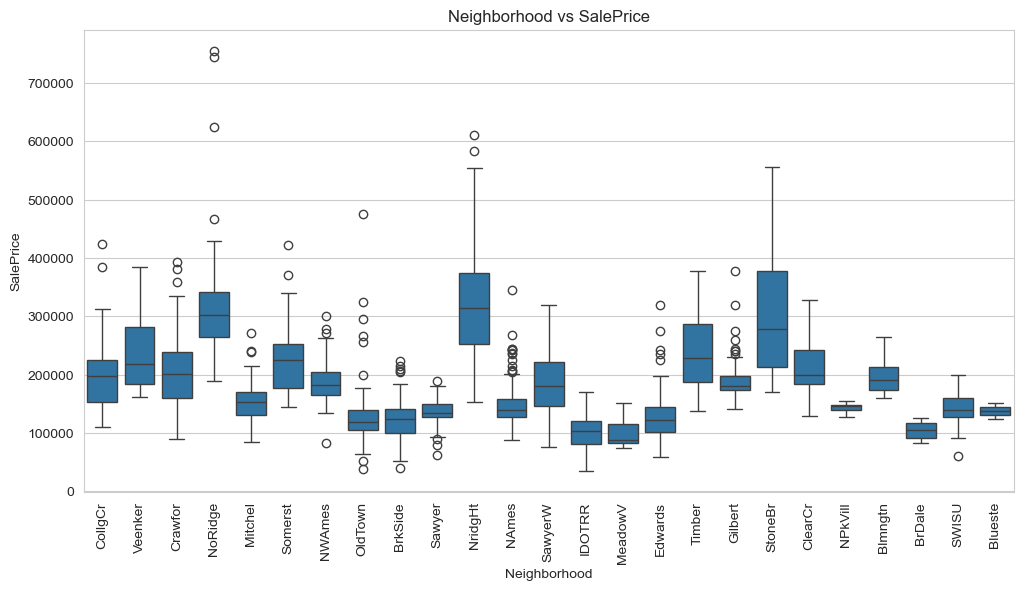

In [24]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title('Neighborhood vs SalePrice')
plt.show()

## Multivariate Analysis
###  Correlation Heatmap (Numerical Features)

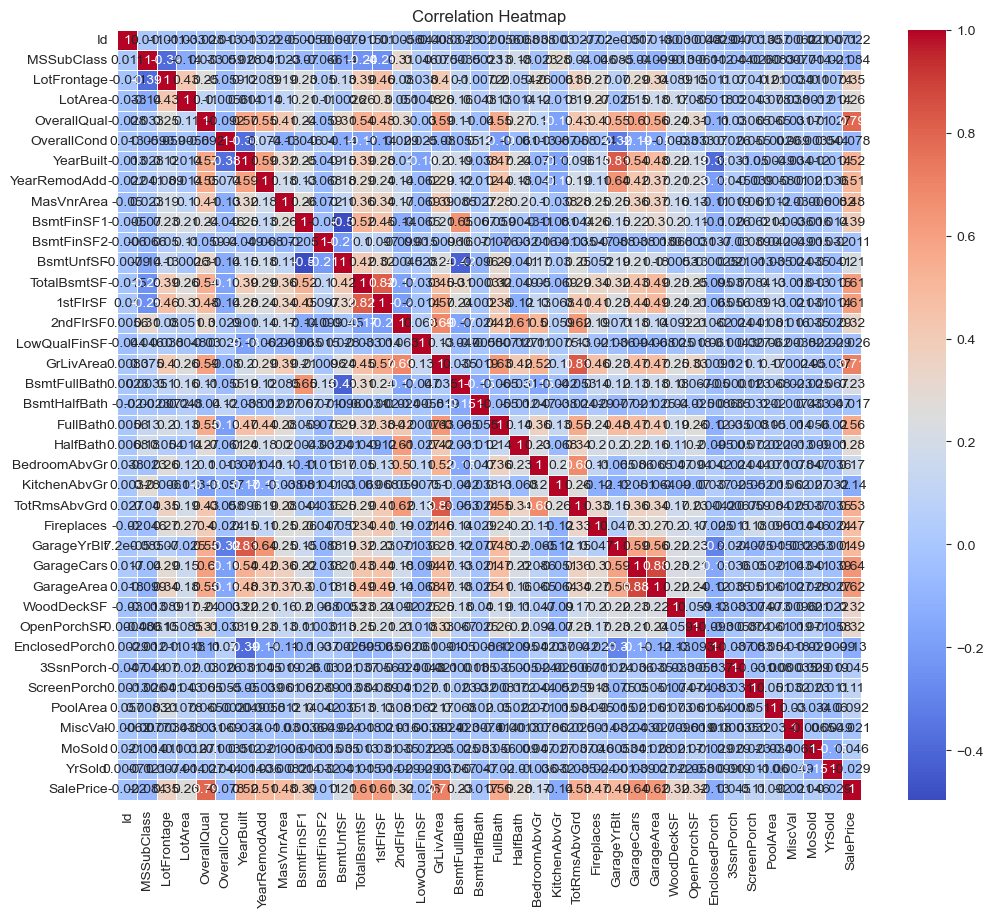

In [26]:
plt.figure(figsize=(12,10))
corr = df.select_dtypes(include=np.number).corr()
sns.heatmap(corr, cmap='coolwarm',annot=True, linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

## Target Analysis with Categorical Features

### SalePrice by MSZoning

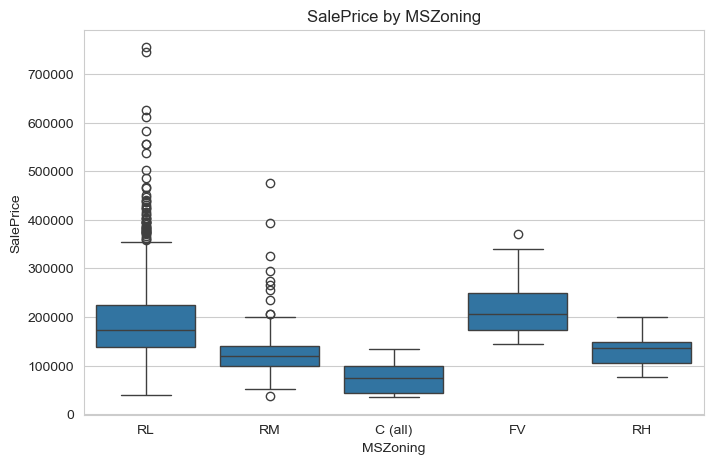

In [27]:
plt.figure(figsize=(8,5))
sns.boxplot(x='MSZoning', y='SalePrice', data=df)
plt.title('SalePrice by MSZoning')
plt.show()

## SalePrice by HouseStyle

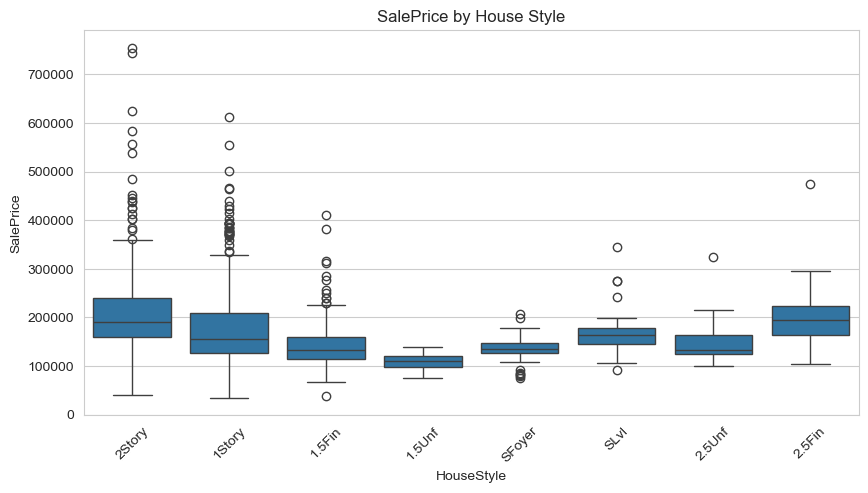

In [28]:
plt.figure(figsize=(10,5))
sns.boxplot(x='HouseStyle', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title('SalePrice by House Style')
plt.show()

## SalePrice by CentralAir

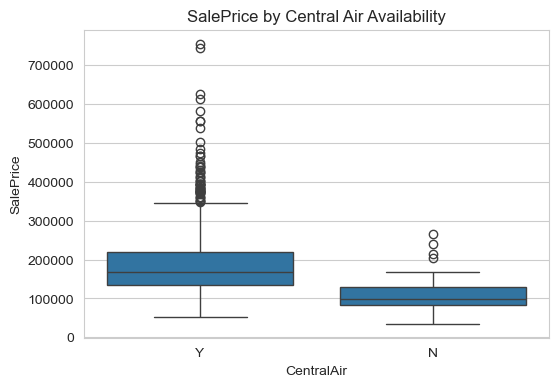

In [29]:
plt.figure(figsize=(6,4))
sns.boxplot(x='CentralAir', y='SalePrice', data=df)
plt.title('SalePrice by Central Air Availability')
plt.show()

## SalePrice by SaleCondition

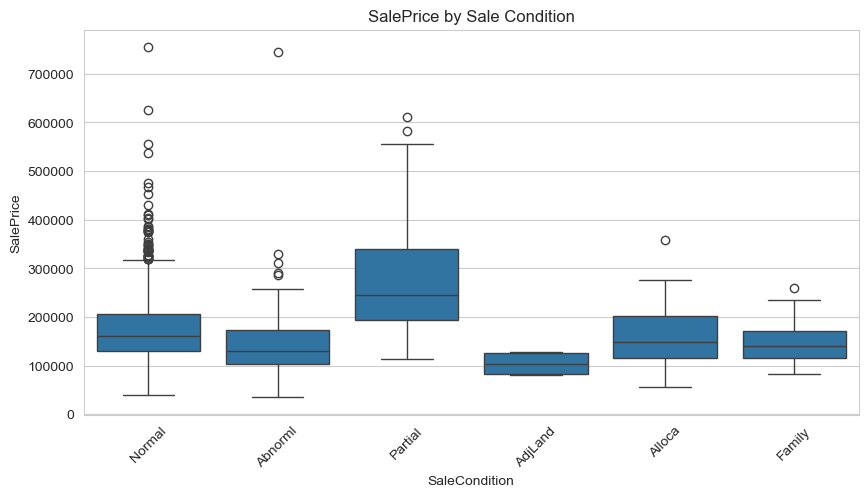

In [30]:
plt.figure(figsize=(10,5))
sns.boxplot(x='SaleCondition', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title('SalePrice by Sale Condition')
plt.show()

# Pair Plot Analysis (Top Numerical Features)

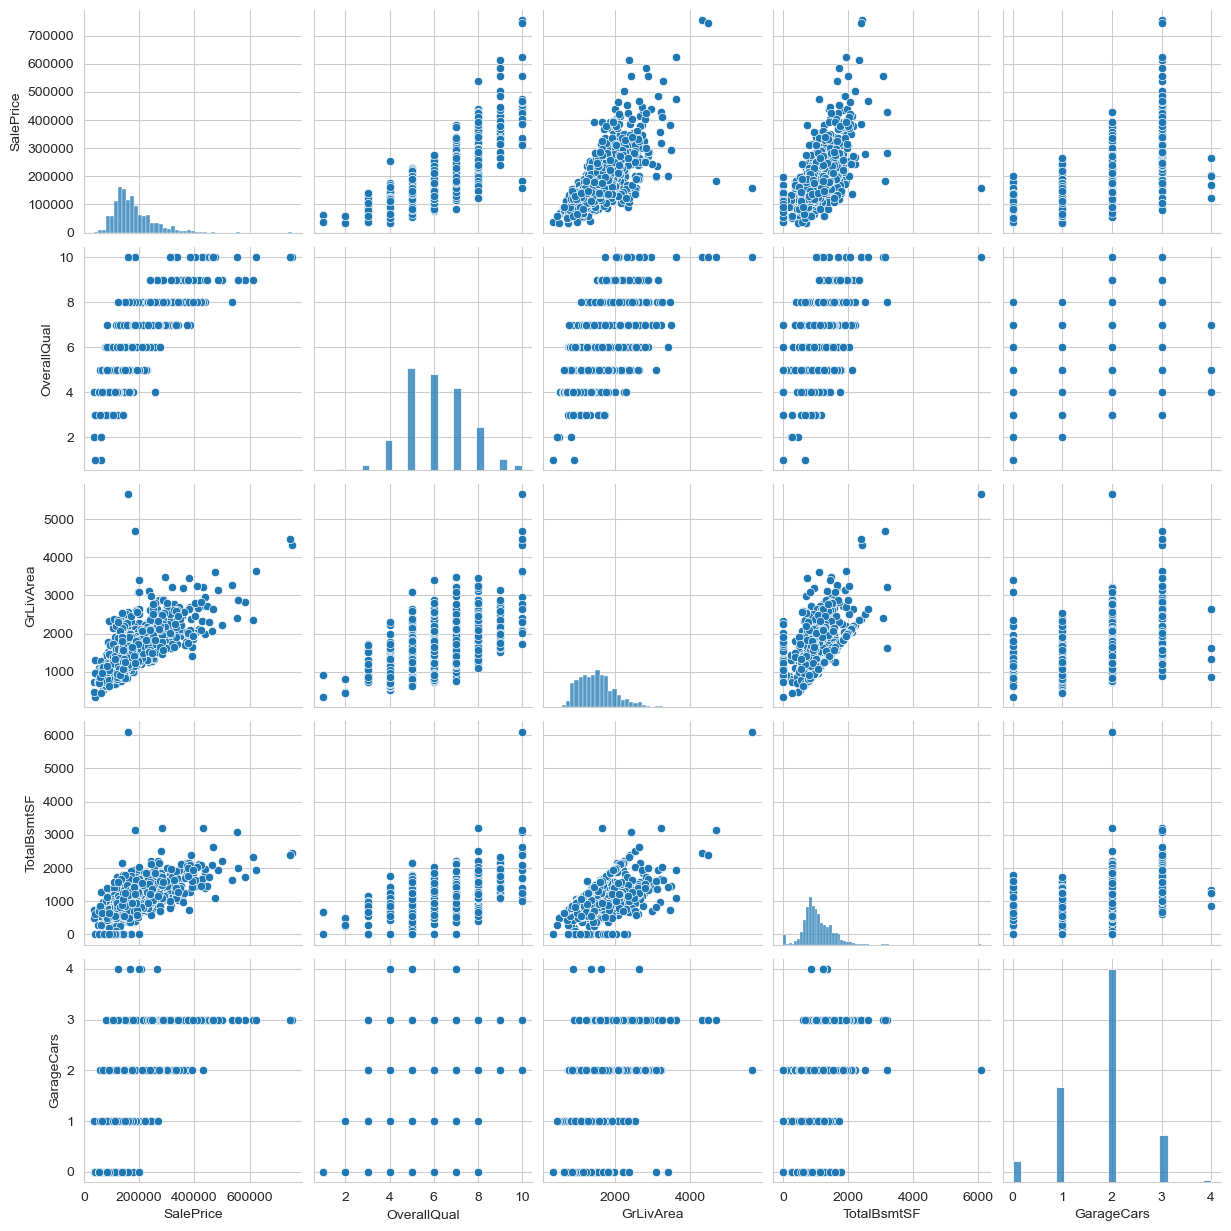

In [31]:
top_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars']
sns.pairplot(df[top_features])
plt.show()

# DISTRIBUTION PLOTS FOR ALL NUMERIC COLUMNS

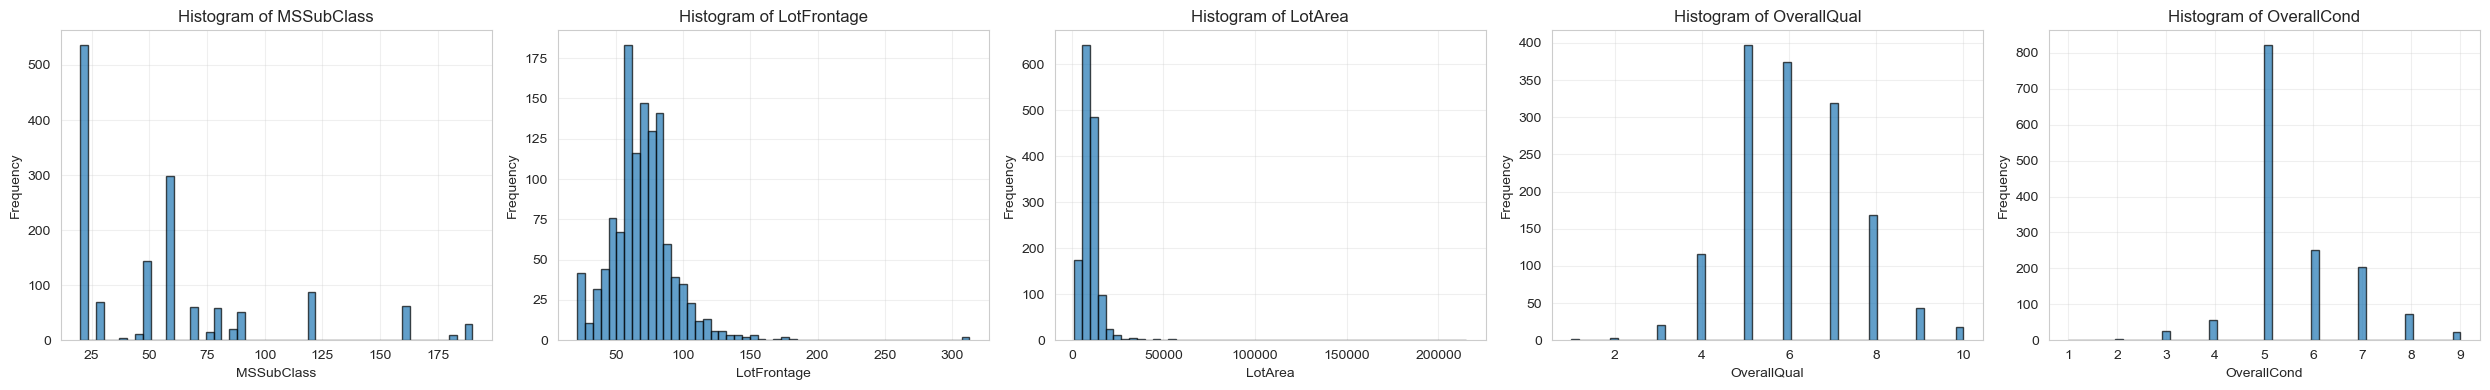

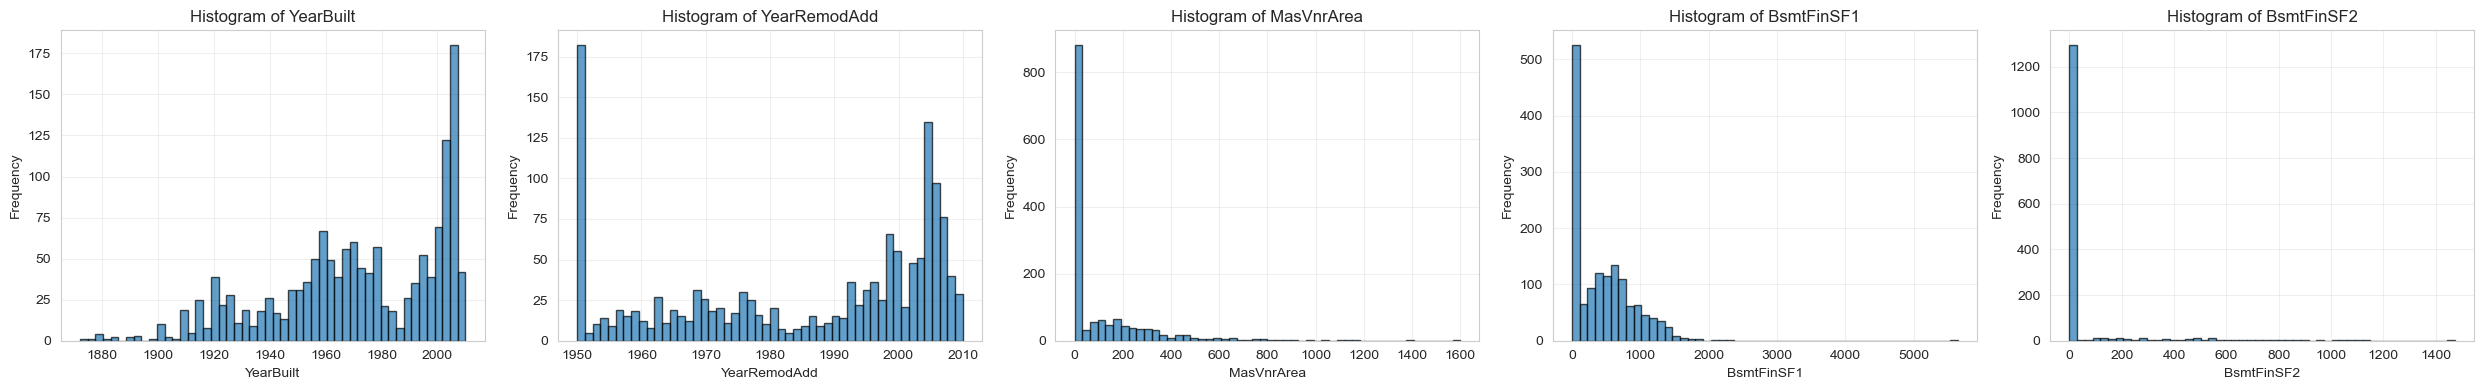

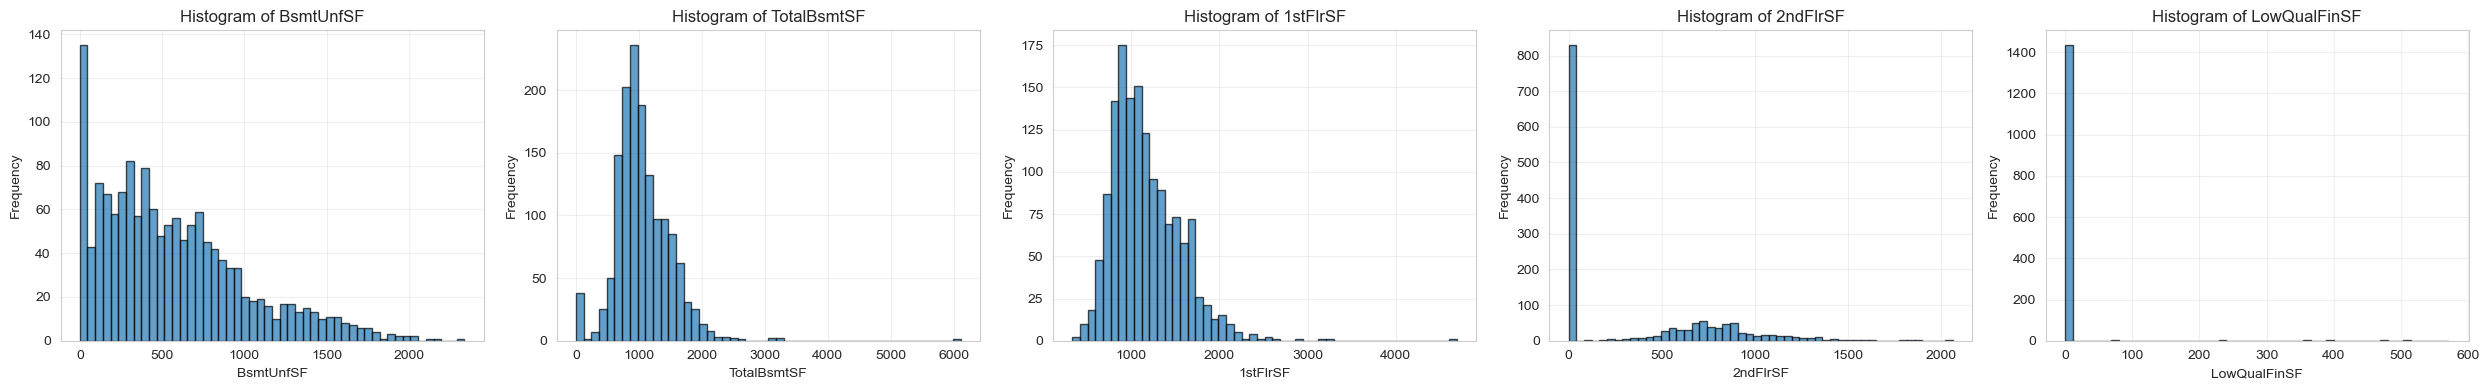

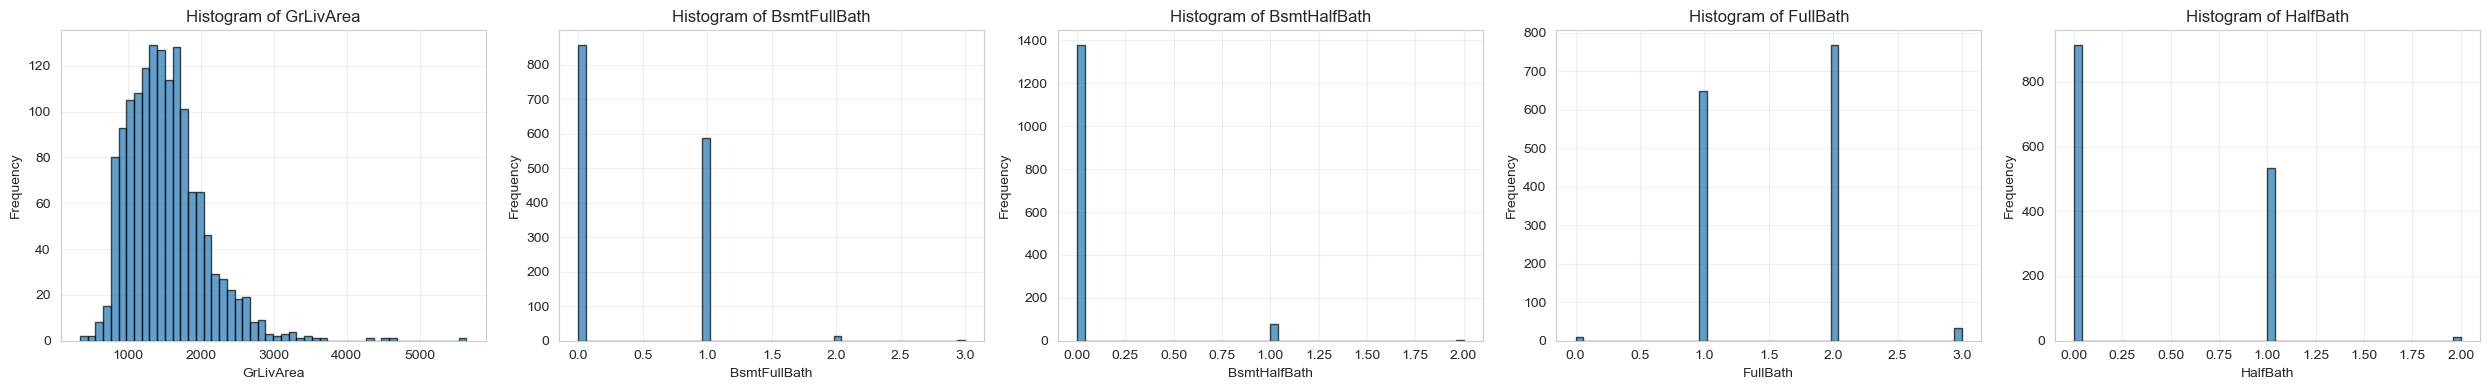

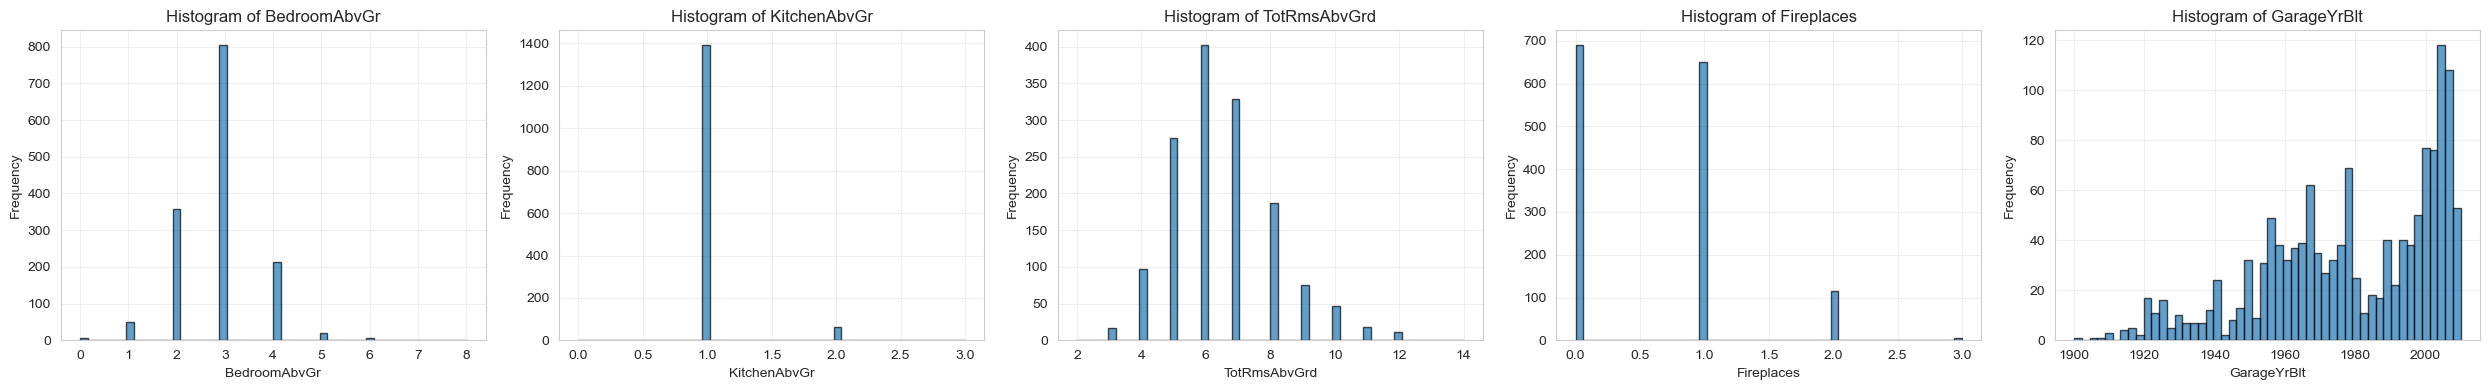

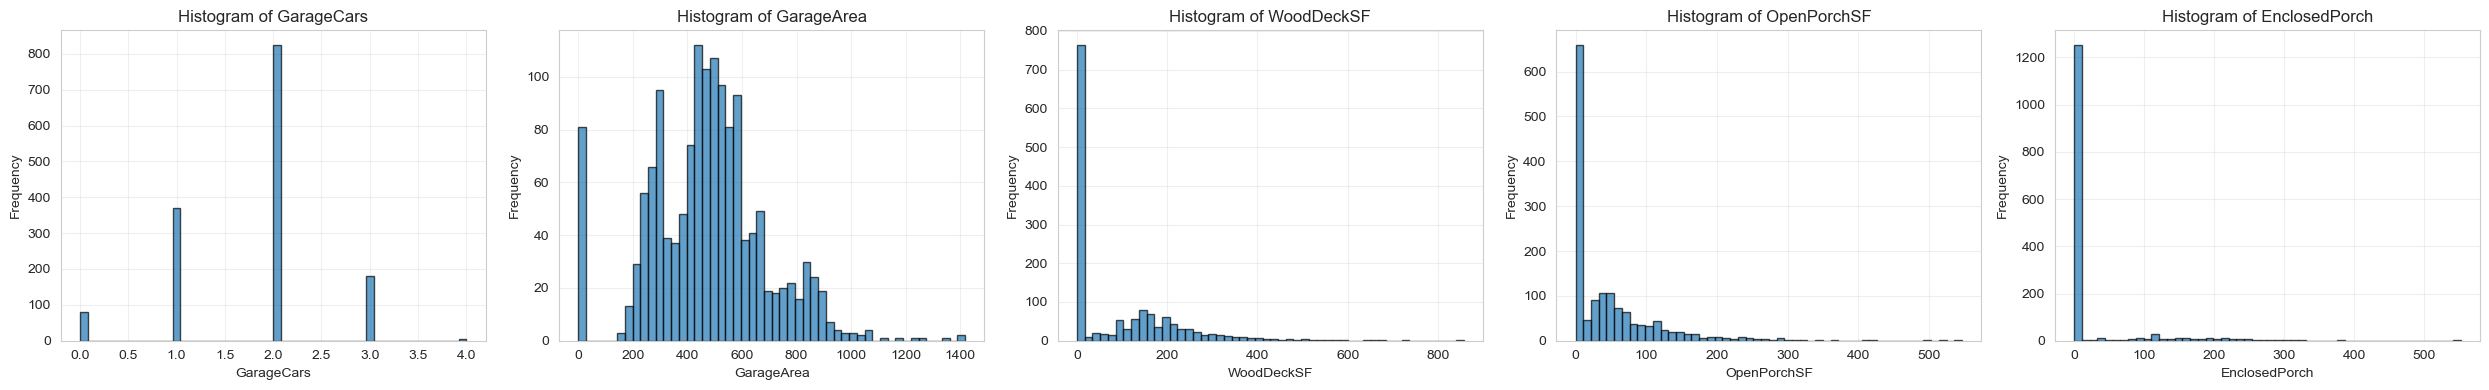

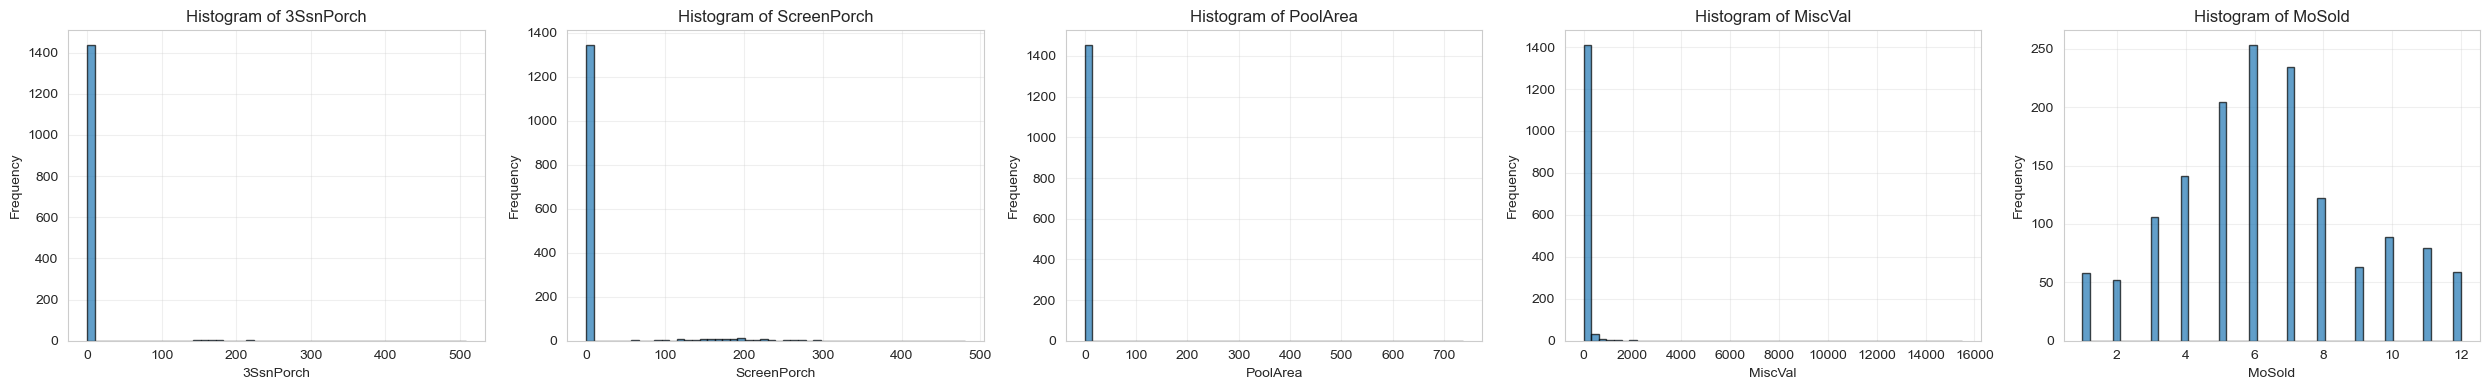

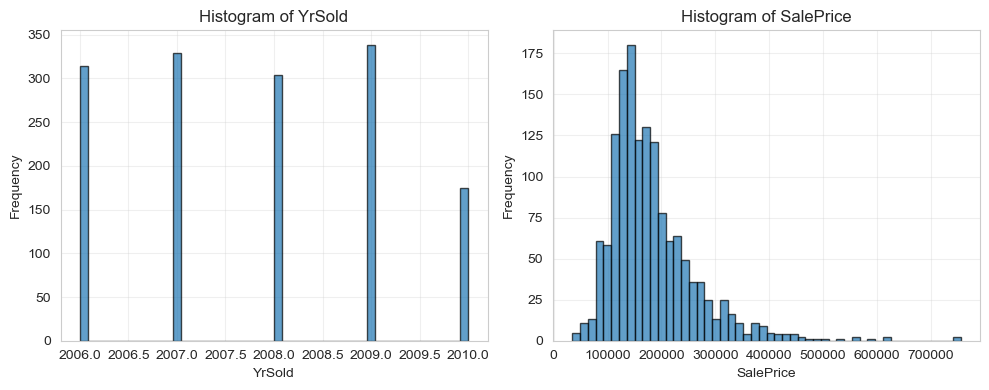

In [38]:
# Histograms
for i in range(0, len(numeric_cols), 5):
    batch = numeric_cols[i:i+5]
    fig, axes = plt.subplots(1, len(batch), figsize=(5*len(batch), 4))
    if len(batch) == 1:
        axes = [axes]
    for j, col in enumerate(batch):
        axes[j].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
        axes[j].set_title(f'Histogram of {col}')
        axes[j].set_xlabel(col)
        axes[j].set_ylabel('Frequency')
        axes[j].grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()